In [50]:
#Script created by Matt Walentosky on 2022-10-03
#Script is designed to analyze Applebees Site traffic analysis
#Github repo: https://github.com/matt-walentosky-bt/applebees_user_pathing_analysis

In [81]:
#Import desired packages
import ga4_user_pathing
import pandas as pd
import os

In [82]:
#Parameters from Tyler Norris / Vanessa Schneider
# Globals:
COUNT_FIELD = 'counts' # DF fields references to aggregations value (users, sessions)
NODE_OPACITY = .9
LINK_OPACITY = .6
SEP_VAL = ' > '
KEY_PATH = '/Users/vanessaschneider/keys/dse-chase-user-pathing.json'

In [83]:
#Get working directory
os.getcwd()

'/Users/mattwalentosky/Documents/General/local_repo/applebees'

In [85]:
#Read desired document
conversion_status = False

if conversion_status == True:
    df = pd.read_csv("applebees_converters_20221003.csv")
else:
    df = pd.read_csv("applebees_nonconverters_20221003.csv")
    
#Note, we can only pull fraction of data from BQ into CSV format   

In [86]:
print(df.shape)
print("----")
print(df.head())

(47861, 3)
----
          journey  conversion_flg  counts
0   PV: Home Page           False  138938
1     PV: Entrees           False   73869
2       PV:  Menu           False   36793
3     PV: Sign Up           False   32495
4  PV: Appetizers           False   21505


In [87]:
df['journey_length'] = df.apply(lambda x: len(x['journey'].split(SEP_VAL)), axis=1)

In [88]:
df.describe()

,counts,journey_length
count,47861.000000,47861.000000
mean,14.874324,9.624851
std,769.399628,6.255834
min,1.000000,1.000000
25%,1.000000,6.000000
50%,2.000000,8.000000
75%,3.000000,11.000000
max,138938.000000,212.000000


In [89]:
df.head(21)

,journey,conversion_flg,counts,journey_length
0,PV: Home Page,False,138938,1
1,PV: Entrees,False,73869,1
2,PV: Menu,False,36793,1
3,PV: Sign Up,False,32495,1
4,PV: Appetizers,False,21505,1
5,PV: Menu > PV: Entrees,False,10293,2
6,PV: Appetizers > PV: Entrees,False,9841,2
7,PV: Entrees > PV: Menu,False,8911,2
8,PV: Entrees > PV: Menu > PV: Entrees,False,7989,3
9,Page View: Offers,False,7476,1


<AxesSubplot:>

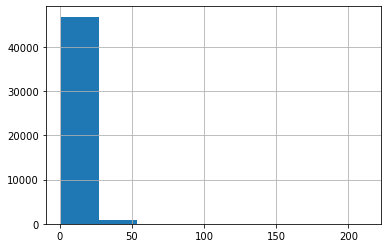

In [90]:
# Change min journey lenght and number of bins to further explore
df[df['journey_length'] > 0]['journey_length'].hist(bins=8)

<AxesSubplot:>

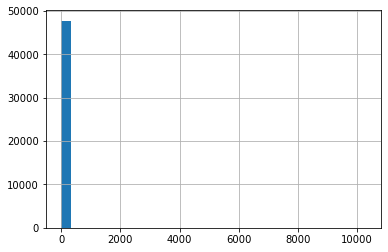

In [91]:
df[df['journey_length'] > 1]['counts'].hist(bins=30)

In [92]:
df.head(10)

,journey,conversion_flg,counts,journey_length
0,PV: Home Page,False,138938,1
1,PV: Entrees,False,73869,1
2,PV: Menu,False,36793,1
3,PV: Sign Up,False,32495,1
4,PV: Appetizers,False,21505,1
5,PV: Menu > PV: Entrees,False,10293,2
6,PV: Appetizers > PV: Entrees,False,9841,2
7,PV: Entrees > PV: Menu,False,8911,2
8,PV: Entrees > PV: Menu > PV: Entrees,False,7989,3
9,Page View: Offers,False,7476,1


In [93]:
df = ga4_user_pathing.add_journey_end_string(df, journey_col='journey', conversion_column='Conversion', sep_val=' > ')
df = ga4_user_pathing.parse_steps(df, sep_val=' > ', max_steps=5)

In [94]:
df['journey'][1]

'PV: Entrees > Journey End'

In [110]:
df_filtered.columns

Index(['journey', 'conversion_flg', 'counts', 'journey_length', 'step_1',
       'step_2', 'step_3', 'step_4', 'step_5'],
      dtype='object')

In [66]:
#df_filtered = ga4_user_pathing.remove_long_tail_jouneys(df, count_col='counts', min_path_count=10)

In [119]:
df_filtered = df[(df['journey_length'] >= 6) & (df['journey_length'] <= 9)]
df_filtered = df_filtered.sort_values('counts', ascending = False)
df_filtered = df_filtered.iloc[0:10,:]

In [121]:
df_sankey, df_index = ga4_user_pathing.generate_sankey_inputs(df_filtered, COUNT_FIELD, .9)

In [122]:
df_sankey.head()

,source,target,counts,source_index,color,target_index
0,PV: Menu,PV: Appetizers,1048,2,"rgba(45, 27, 181, 0.9)",0
1,PV: Menu,PV: Drinks,319,2,"rgba(45, 27, 181, 0.9)",5
2,PV: Menu,PV: Entrees,546,2,"rgba(45, 27, 181, 0.9)",1
3,PV: Menu,PV: Home Page,391,2,"rgba(45, 27, 181, 0.9)",3
4,PV: Appetizers,PV: Entrees,2194,0,"rgba(142, 140, 153, 0.9)",1


In [125]:
df_filtered

,journey,conversion_flg,counts,journey_length,step_1,step_2,step_3,step_4,step_5
100,PV: Home Page > PV: Confirm Restaurant > PV: O...,False,458,6,PV: Home Page,PV: Confirm Restaurant,PV: Order Method,PV: Menu,PV: Appetizers
110,PV: Appetizers > PV: Entrees > PV: Kids Menu >...,False,418,6,PV: Appetizers,PV: Entrees,PV: Kids Menu,Page View: Offers,PV: Drinks
115,PV: Menu > PV: Home Page > PV: Order Method >...,False,391,6,PV: Menu,PV: Home Page,PV: Order Method,PV: Menu,PV: Appetizers
130,PV: Menu > PV: Entrees > PV: Appetizers > PV:...,False,338,6,PV: Menu,PV: Entrees,PV: Appetizers,PV: Entrees,PV: Appetizers
141,PV: Home Page > PV: Order Method > PV: Menu >...,False,319,6,PV: Home Page,PV: Order Method,PV: Menu,PV: Drinks,PV: Appetizers
146,PV: Appetizers > PV: Entrees > PV: Appetizers ...,False,301,6,PV: Appetizers,PV: Entrees,PV: Appetizers,PV: Entrees,PV: Appetizers
176,PV: Appetizers > PV: Entrees > PV: Kids Menu >...,False,233,6,PV: Appetizers,PV: Entrees,PV: Kids Menu,PV: Entrees,PV: Appetizers
202,PV: Home Page > PV: Order Method > PV: Menu >...,False,208,6,PV: Home Page,PV: Order Method,PV: Menu,PV: Entrees,PV: Appetizers
210,PV: Entrees > PV: Appetizers > PV: Entrees > P...,False,202,7,PV: Entrees,PV: Appetizers,PV: Entrees,PV: Appetizers,PV: Entrees
214,PV: Menu > PV: Appetizers > PV: Entrees > PV:...,False,199,6,PV: Menu,PV: Appetizers,PV: Entrees,PV: Kids Menu,PV: Drinks


In [124]:
ga4_user_pathing.display_sankey(df_sankey, df_index, count_field=COUNT_FIELD, link_opacity=.3)